In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq as hp

In [2]:
number_of_windows = [100, 500, 1000]
alphas = [0.25, 0.5, 1.0, 2.0, 4.0]
total_count = 1000

Посчитаем для двух человек в очереди. 

Для этого сначала для каждого окошка посмотрим, когда оттуда уйдёт первый посетитель, а затем отсортируем полученные значения, чтобы получить время ожидания для конкретного человека в очереди

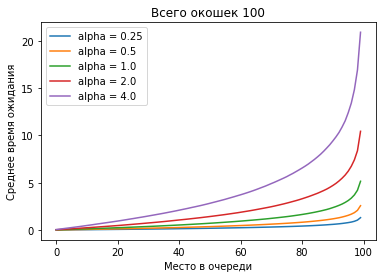

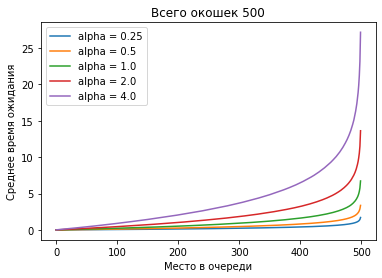

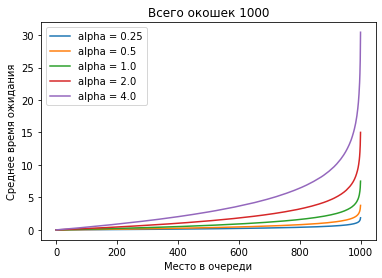

<Figure size 432x288 with 0 Axes>

In [3]:
legends = []
for number in number_of_windows:
    x = range(number)
    for alpha in alphas:
        result = np.zeros(number)
        for i in range(total_count):
            result += np.sort(np.random.exponential(alpha, number))
        y = result / total_count
        plt.plot(x, y)
        legends.append(f"alpha = {alpha}")
    plt.title(f"Всего окошек {number}")
    plt.xlabel("Место в очереди")
    plt.ylabel("Среднее время ожидания")
    plt.legend(legends)
    plt.show()
    plt.clf()

Теперь посчитаем для окошек, у которых количество посетителей неограничено.

Для этого добавим времена обслуживания первых посетителей в кучу. Тогда для того, чтобы найти свободное окошко, нужно достать элемент из кучи, а затем добавить в кучу время, когда это окошко освободится в следующий раз

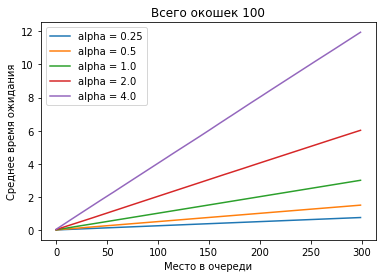

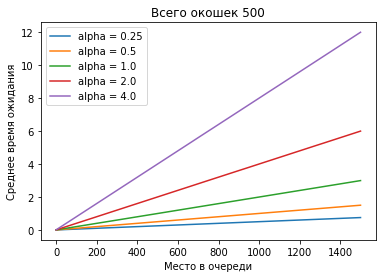

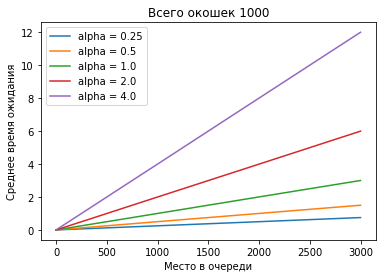

<Figure size 432x288 with 0 Axes>

In [4]:
CONST = 3

def modelling(number, alpha):
    times = list(np.sort(np.random.exponential(alpha, number)))
    hp.heapify(times)
    result = []
    for i in range(CONST * number):
        result.append(hp.heappop(times))
        hp.heappush(times, np.random.exponential(alpha) + result[i])
    return np.array(result)

legends = []

for number in number_of_windows:
    x = range(CONST * number)
    for alpha in alphas:
        result = np.zeros(CONST * number)
        for i in range(total_count):
            result += modelling(number, alpha)
        y = result / total_count
        plt.plot(x, y)
        legends.append(f"alpha = {alpha}")
    plt.title(f"Всего окошек {number}")
    plt.xlabel("Место в очереди")
    plt.ylabel("Среднее время ожидания")
    plt.legend(legends)
    plt.show()
    plt.clf()

Заметим, что в первом эксперименте получается, что среднее время ожидания зависит как-то похоже на экспоненту, в чём, на самом деле, не было ничего удивительного, поскольку фактически мы просто брали значения из экспоненциального распределения. Но во втором эксперименте уже получается интереснее, поскольку среднее время ожидания человека в очереди стало зависеть как-то линейно от места в очереди